## Electric Fields

If you're familiar with the Coulomb force, then you already know about half of E&M (the E part).  In a sense, the rest is just a bunch of specific consequences of the Coulomb force, along with a mathematical framework to make problem solving a bit easier.

The first part of this mathematical framework is the concept of the *electric field*.  At first glance, it just seems like a matter of semantics.  Rather than saying charge 1 causes a (Coulomb) force on charge 2, we can say charge 1 produces an electric field $\vec{E_1}$, and charge 2 ($q_2$) feels a force $\vec{F_2}$ because of the electric field:

$\vec{F_2} = q_2 \vec{E_1}$.

From a physicist's perspective, a [field](https://en.wikipedia.org/wiki/Field_(physics)) is just a mathematical object with a particular value at every point in space (and time).  For example, saying that there is a "temperature field" expresses the fact that I can pick any point in a room and measure a specific value of the temperature.  The electric field is just like this, except the measured values are vectors--so there's also a directional component.  

**One thing about the (confusing) language used with this topic**: we say things like "charge 1 produces an electric field" and "find the electric field from charge 1".  If we want to be proper with our words, it's better to say that the electric field is a thing that exists, and the *value* of the electric field at a particular point is determined by considering charge 1 (and all other charges).  In a universe (or problem) without any charged particles, the electric field is still there--it's value is just 0 everywhere.

Below is a diagram expressing the values of the electric field when there is a positive charge (red dot) at the origin.  A vector is drawn at every point along a grid.  The length of the vector gives the magnitude of the electric field at that point.   Note that the electric field is larger near the positive charge.  If we were to place another positive charge at some point on this diagram, the direction of the vector gives the direction of the force on this charge. 




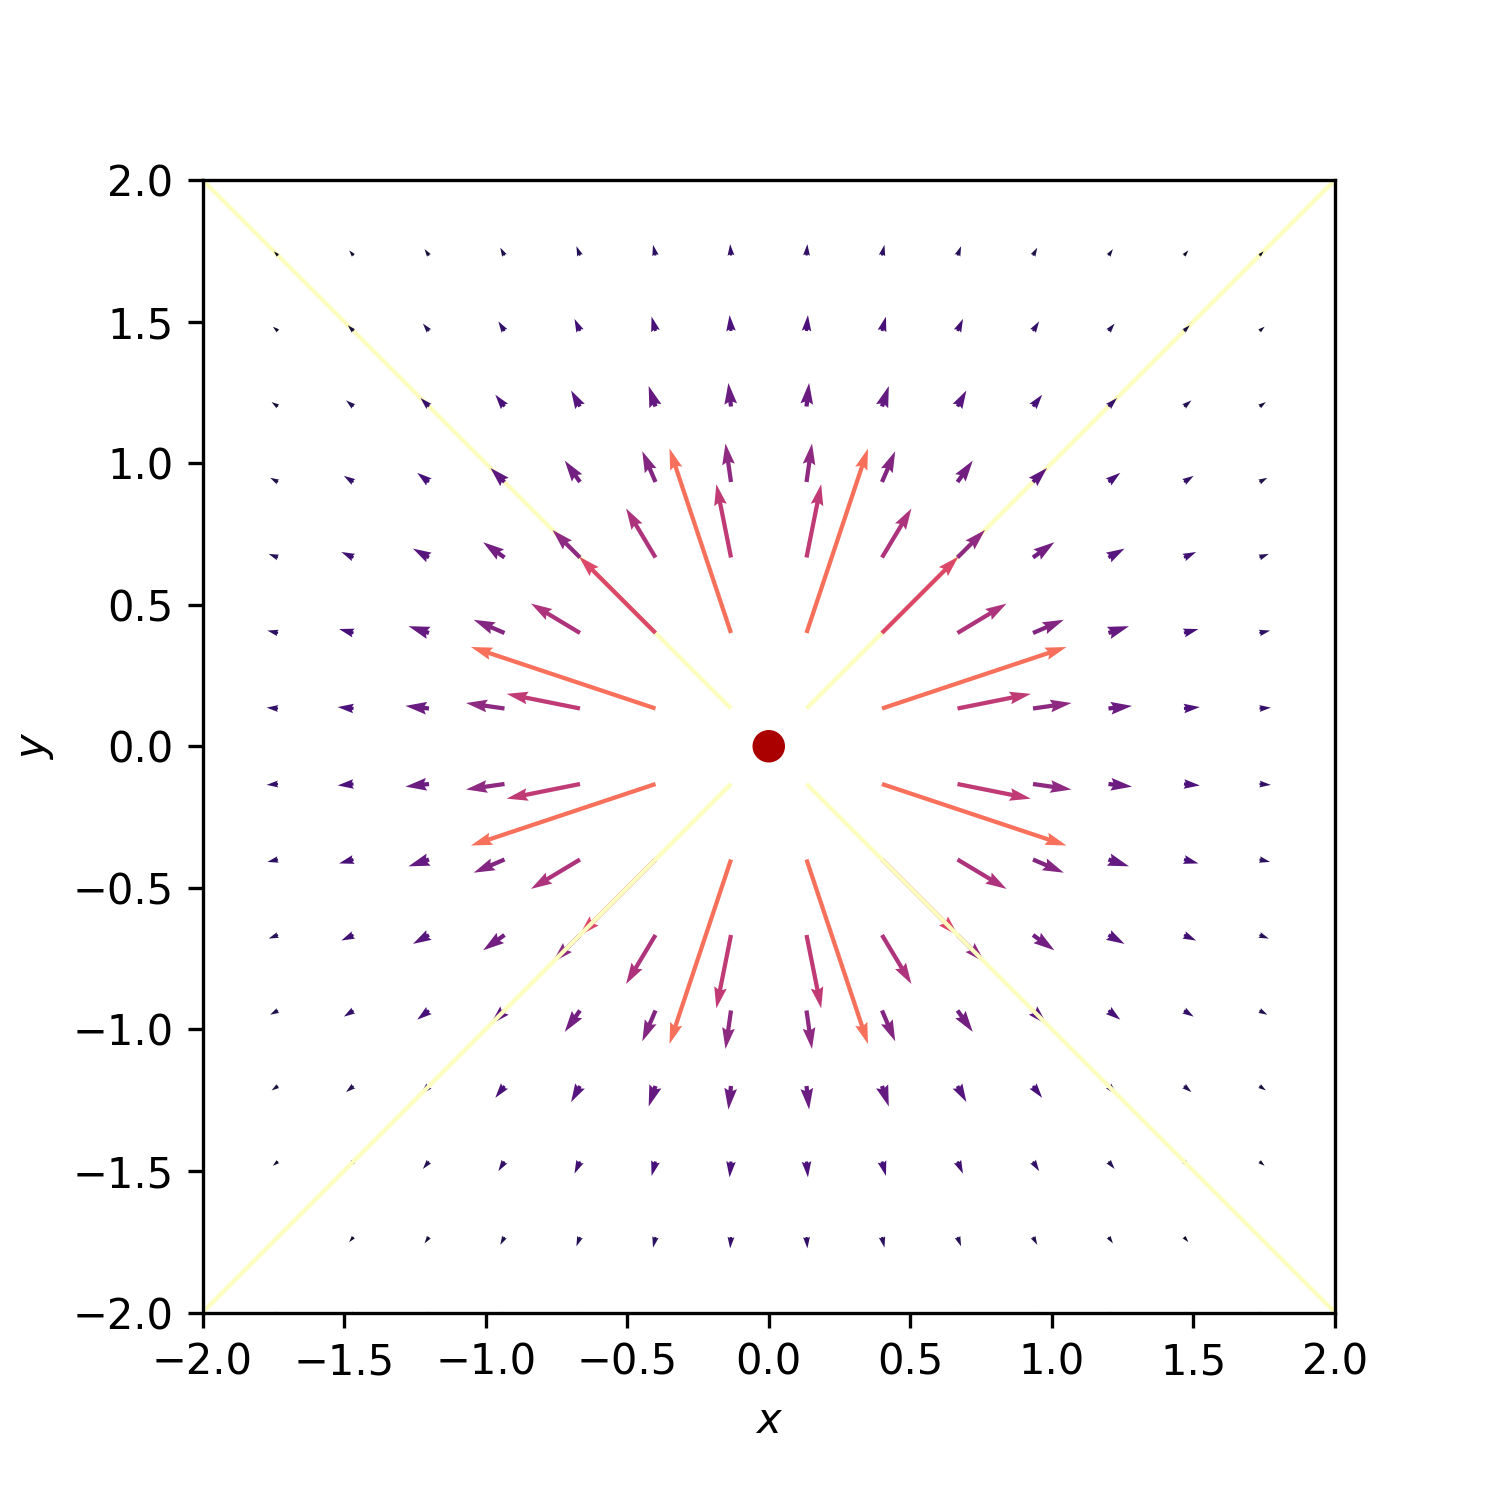

It doesn't seem like we get anything new from doing this; why not just calculate the force directly instead of finding this electric field thing first?  Well, if you know the value of the electric field at a particular point in space, then you immediately know the force on any charge you place at that point.  Plus, it turns out that there's a nice thing called Gauss' Law that lets us find the electric field very quickly for certain charge distributions.  From a problem solving perspective, these two things make learning about $\vec{E}$ worthwhile.

It's a matter of philosophy whether or not this electric field actually exists, but thinking of it as a physical thing turns out to be very useful.  When we look at the "M" part of E&M, we'll talk about magnetic fields and the magnetic forces they create.  Once again, this field is one level of abstraction away from a force.  However, it turns out that a few physical laws are concisely expressed as an interaction between electric and magnetic fields.

## Superposition

Another useful property of the electric field is that its net value at a particular location can be expressed as a *superposition* of values from a bunch of individual charges.  We did the same thing in 7A with forces; the net force on some object is the sum of all the individual forces: gravity, normal force, friction, etc.  So, if we have several charges $q_1, q_2, ...$ then we can write

$\vec{E_{net}} = \vec{E_1} + \vec{E_2} + ...$

I think this is where we get phrases like "find the electric field from charge 1", which would be $\vec{E_1}$ in this case.  The point is this: if we have a distribution of charge, we are free to:

- break it up into as many different pieces as we would like
- find the resulting electric field from each piece separately
- add together all the individual results to find the net electric field

These "pieces" could be individual charges, entire charge distributions (like a sphere of charge plus a line of charge), or infinitesimal bits of charge.  The code below should generate a plot of the electric field in the presence of $N$ positive charges, distributed along a line.  As you increase the number of charges (i.e. increase the length of the charged line), note how the net electric field tends to point directly away from the line; also, the lengths of the vectors (magnitude of field) increase as we add charges.  Does this behavior follow from the superposition principle?

<IPython.core.display.Javascript object>


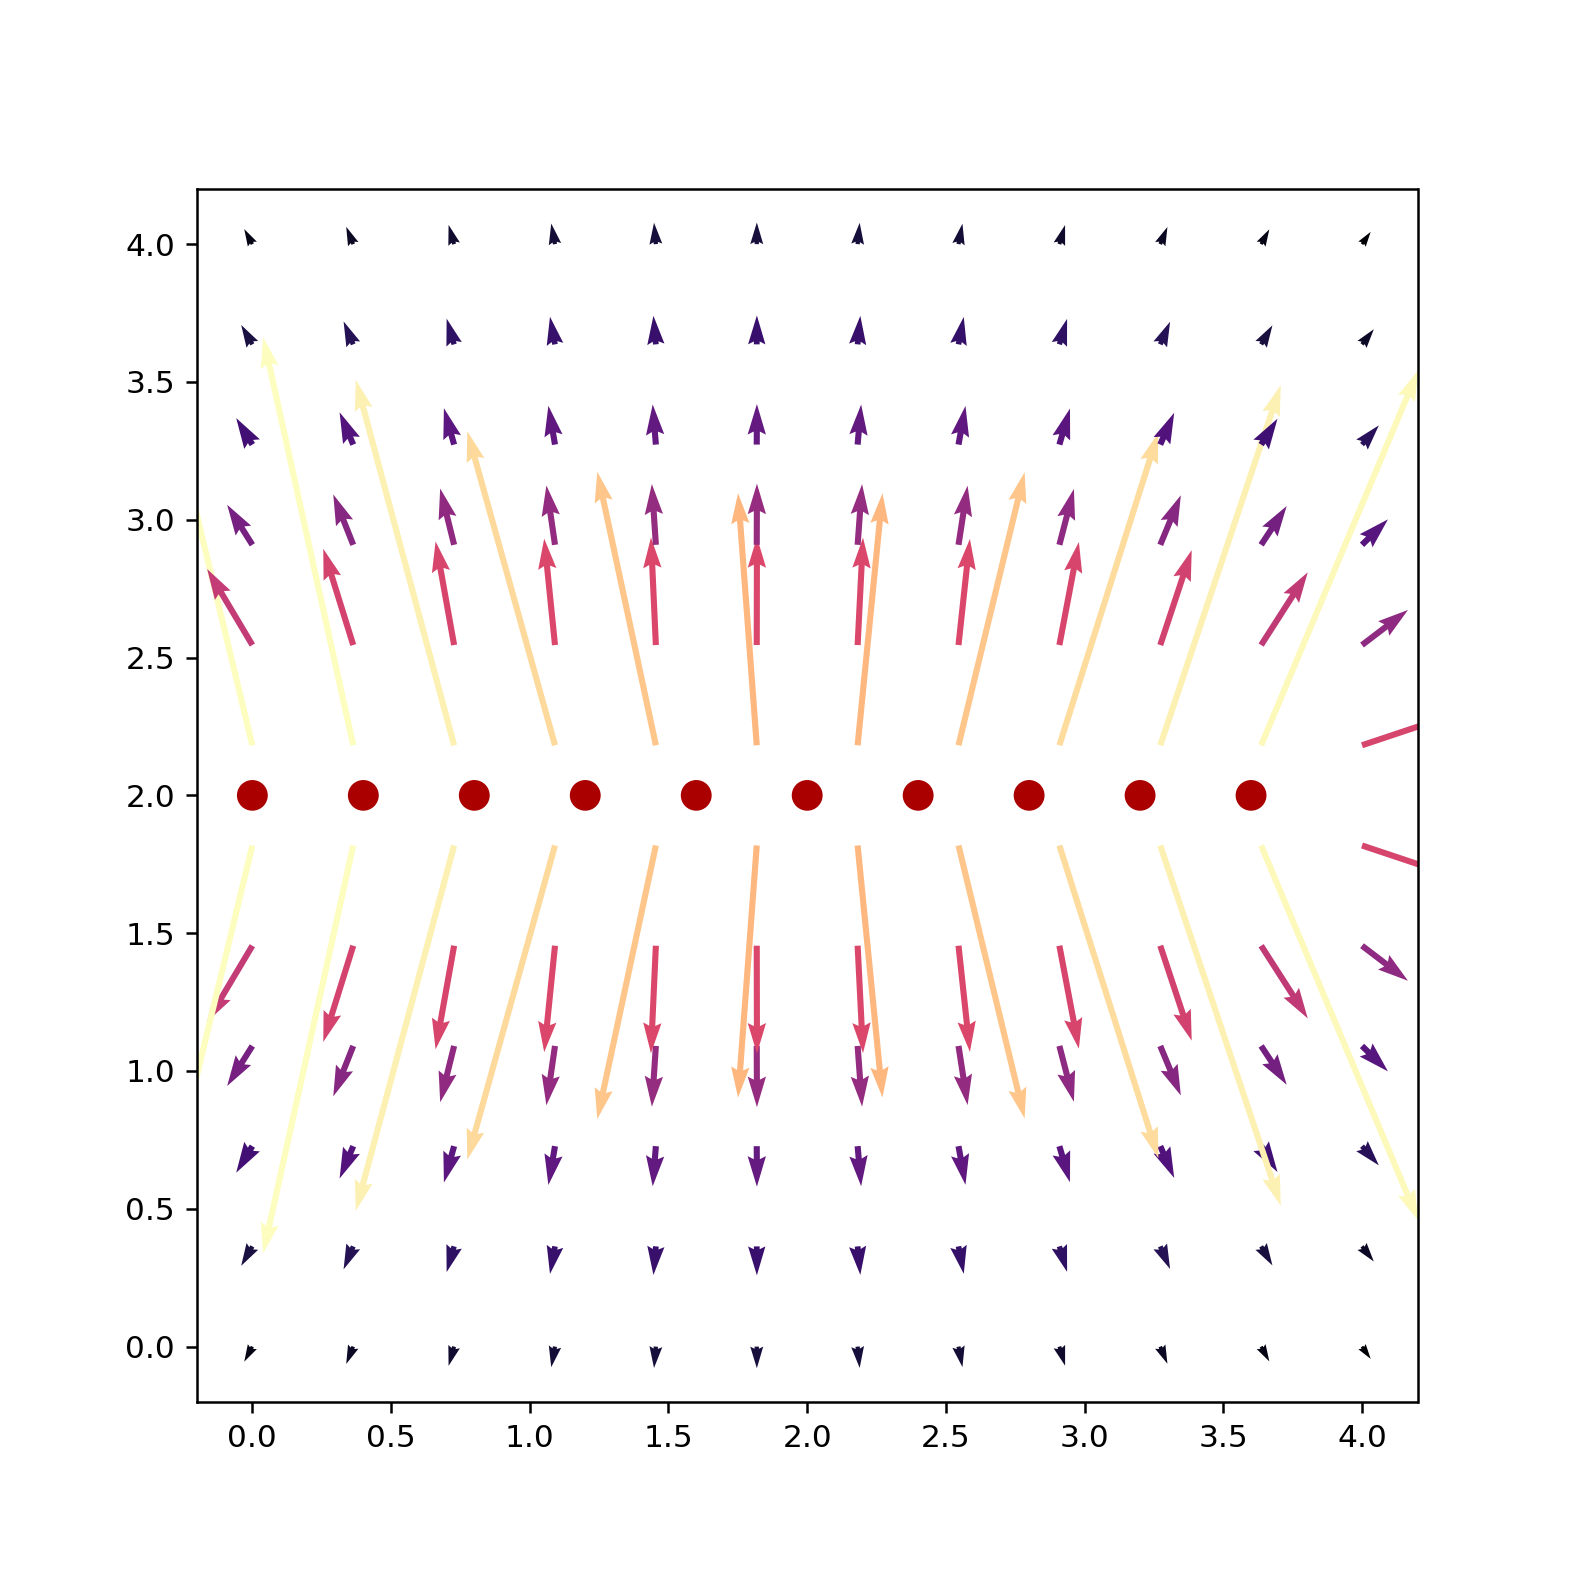

interactive(children=(IntSlider(value=1, description='N', max=10, min=1), Output()), _dom_classes=('widget-int…

In [4]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def E(q, r0, x, y):
    """Return the electric field vector E=(Ex,Ey) due to charge q at r0."""
    den = np.hypot(x-r0[0], y-r0[1])**3
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den

# Grid of x, y points
nx, ny = 12,12
x = np.linspace(0, 4, nx)
y = np.linspace(0, 4, ny)
X, Y = np.meshgrid(x, y)

# Create a multipole with nq charges of alternating sign, equally spaced
# on the unit circle.
nq = 1
charges = []
for i in range(nq):
    q = 1
    charges.append((q, (4*i/10,2)))

# Electric field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for charge in charges:
    ex, ey = E(*charge, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = 2 * np.log(np.hypot(Ex, Ey))
ax.quiver(x, y, Ex, Ey, color, cmap = 'magma', scale = 100)

# Add filled circles for the charges themselves
charge_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in charges:
    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0]))


def update(N = 1.0):
    ax.clear()
    nq = int(N)
    charges = []
    for i in range(nq):
        q = 1
        charges.append((q, (4*i/10,2)))

    # Electric field vector, E=(Ex, Ey), as separate components
    Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
    for charge in charges:
        ex, ey = E(*charge, x=X, y=Y)
        Ex += ex
        Ey += ey

    # Plot the streamlines with an appropriate colormap and arrow style
    color = 2 * np.log(np.hypot(Ex, Ey))
    ax.quiver(x, y, Ex, Ey, color, cmap = 'magma', scale = 100)

    # Add filled circles for the charges themselves
    charge_colors = {True: '#aa0000', False: '#0000aa'}
    for q, pos in charges:
        ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0]))
        
    fig.canvas.draw_idle()

interact(update, N=(1, 10, 1));